In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import cm
from root_pandas import read_root
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
import ROOT
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
from scipy.stats import chi2
from scipy import interpolate
import pandas as pd
import math

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

def getArrays(tree):

    chi2_c = np.zeros(tree.GetEntries())
    dm2_c = np.zeros(tree.GetEntries())
    sin22th_c = np.zeros(tree.GetEntries())
    
    for j in range(tree.GetEntries()):
        tree.GetEntry(j)
        
        chi2_c[j] = tree.chi2
        dm2_c[j] = tree.dm2
        sin22th_c[j] = tree.sin22th
        
    chi2 = chi2_c[chi2_c>0]
    dm2 = dm2_c[chi2_c>0]
    sin22th = sin22th_c[chi2_c>0]
    return chi2, dm2, sin22th

def getContour(sin22th,dm2):

    adm2 = np.asarray(dm2)
    asin22th = np.asarray(sin22th)

    cosin22th = np.zeros(len(np.unique(adm2)))
    codm2 = np.zeros(len(np.unique(adm2)))

    for i in range(len(np.unique(adm2))):
        indy = np.argmin(asin22th[adm2==adm2[i]])
        cosin22th[i] = asin22th[adm2==np.unique(adm2)[i]][indy]
        codm2[i] = np.unique(adm2)[i]    
    return cosin22th, codm2

def getContourt(tree):

    dm2 = np.zeros(tree.GetEntries())
    sin22th = np.zeros(tree.GetEntries())
    
    for j in range(tree.GetEntries()):
        tree.GetEntry(j)
        
        dm2[j] = tree.dm2
        sin22th[j] = tree.sin22th
    
    adm2 = np.asarray(dm2)
    asin22th = np.asarray(sin22th)


    cosin22th = np.zeros(len(np.unique(adm2)))
    codm2 = np.zeros(len(np.unique(adm2)))

    for i in range(len(np.unique(adm2))):
        indy = np.argmin(asin22th[adm2==adm2[i]])
        cosin22th[i] = asin22th[adm2==np.unique(adm2)[i]][indy]
        codm2[i] = np.unique(adm2)[i]    
    
    return cosin22th, codm2

Welcome to JupyROOT 6.16/00


Get values from text files which have the frquentist study results

In [2]:
# we're going to load in two arrays
with open("bins.txt","r") as bins:
    lines = bins.readlines()
    lines[0].strip()
    lines[1].strip()
    vals0 = lines[0].split(" ")
    vals1 = lines[1].split(" ")
    m41_list= []
    sin22theta_list= []
    for v in range(len(vals0)-1):
        m41_list.append(float(vals0[v]))
    for v in range(len(vals1)-1):
        sin22theta_list.append(float(vals1[v]))
print("m values:", m41_list )
print("sin2 values:",sin22theta_list)

m values: [0.01, 0.0144544, 0.020893, 0.0301995, 0.0436516, 0.0630957, 0.0912011, 0.131826, 0.190546, 0.275423, 0.398107, 0.57544, 0.831764, 1.20226, 1.7378, 2.51189, 3.63078, 5.24807, 7.58578, 10.9648, 15.8489, 22.9087, 33.1131, 47.863, 69.1831, 100.0]
sin2 values: [0.0001, 0.000144544, 0.00020893, 0.000301995, 0.000436516, 0.000630957, 0.000912011, 0.00131826, 0.00190546, 0.00275423, 0.00398107, 0.0057544, 0.00831764, 0.0120226, 0.017378, 0.0251189, 0.0363078, 0.0524807, 0.0758578, 0.109648, 0.158489, 0.229087, 0.331131, 0.47863, 0.691831, 1.0]


In [3]:
# chi2 array is more complicated
# each row represents a grid point
# first load as list of lists and make 1D plots

# number of universes used in this simulation
num_uni=5000
# initialize arr to fill
chi2_manyuni_arr=[]
with open("chis.txt","r") as chis:
    lines = chis.readlines()
    for line in lines:
        vals = line.split(" ")
        chi2list = []
        for v in range(len(vals)-1):
            chi2list.append(float(vals[v]))
        chi2_manyuni_arr.append(chi2list)
        
print("size check of text files")
print(len(chi2_manyuni_arr),(len(m41_list)-1)*(len(sin22theta_list)-1))
print(num_uni,len(chi2_manyuni_arr[-1]))
        

size check of text files
625 625
5000 5000


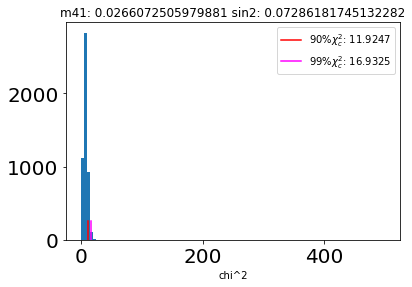

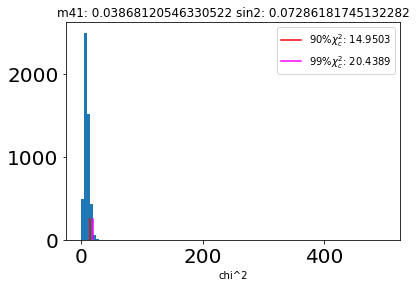

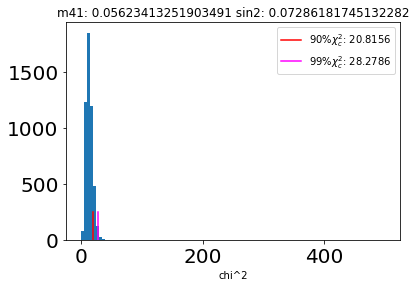

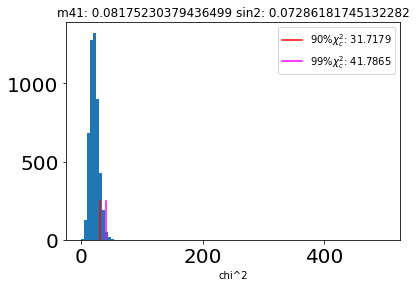

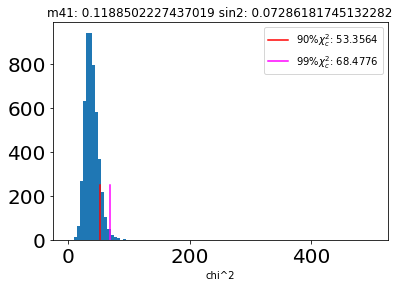

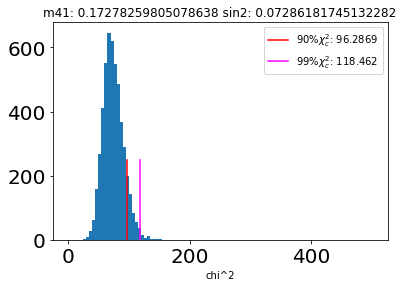

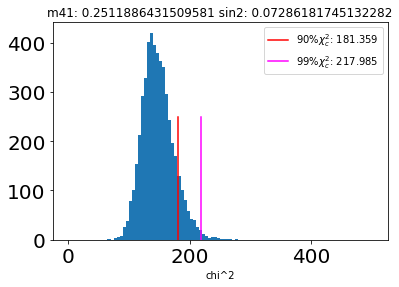

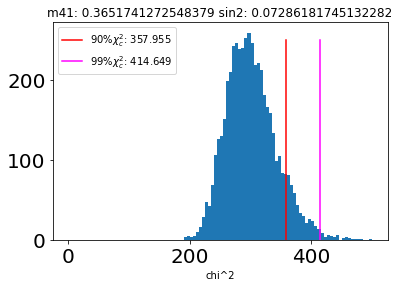

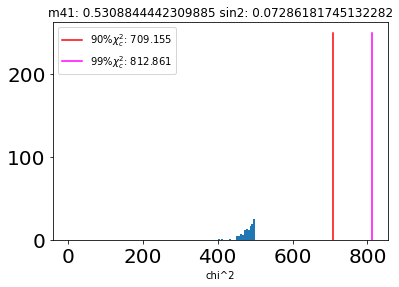

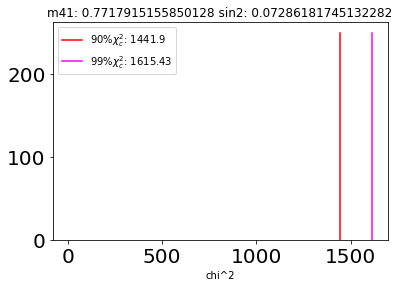

In [43]:
# make 1d plots of chi2 of each grid point
for pt in range(10):
    s_id = math.floor(pt/(len(m41_list)-1))
    m_id = pt % (len(sin22theta_list)-1)
    vls=plt.hist(chi2_manyuni_arr[pt],bins=100, range=[0,500])
    chi2_manyuni_arr[pt].sort()
    val_90th =chi2_manyuni_arr[pt][math.floor(num_uni*.9)]
    val_99th =chi2_manyuni_arr[pt][math.floor(num_uni*.99)]
    plt.title('m41: '+ str(m41_list[m_id])+' sin2: '+str(sin22theta_list[s_id]))
    plt.plot([val_90th,val_90th],[0,250],color='red',label=r'$90\% \chi^2_c$: '+str(val_90th))
    plt.plot([val_99th,val_99th],[0,250],color='magenta',label=r'$99\% \chi^2_c$: '+str(val_99th))
    plt.xlabel('chi^2')
    plt.legend()
    plt.show()
    plt.close()

In [5]:
# for each grid point I need to calculate a chi^2_c (90% of vals are under this value)
chi_c_list_90 = []
chi_c_list_99 = []
for pt in range(len(chi2_manyuni_arr)):
    chi2_manyuni_arr[pt].sort()
    val_90th =math.floor(num_uni*.9)
    val_99th =math.floor(num_uni*.99)
    chi_c_list_90.append(chi2_manyuni_arr[pt][val_90th])
    chi_c_list_99.append(chi2_manyuni_arr[pt][val_99th])

# change to 2d lists
chi_c_array_90=np.zeros((len(m41_list)-1,len(m41_list)-1))
for pt in range(len(chi_c_list_90)):
    s_id = math.floor(pt/(len(m41_list)-1))
    m_id = pt % (len(sin22theta_list)-1)
    chi_c_array_90[m_id][s_id]=chi_c_list_90[pt]
    
chi_c_array_99=np.zeros((len(m41_list)-1,len(m41_list)-1))
for pt in range(len(chi_c_list_99)):
    s_id = math.floor(pt/(len(m41_list)-1))
    m_id = pt % (len(sin22theta_list)-1)
    chi_c_array_99[m_id][s_id]=chi_c_list_99[pt]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


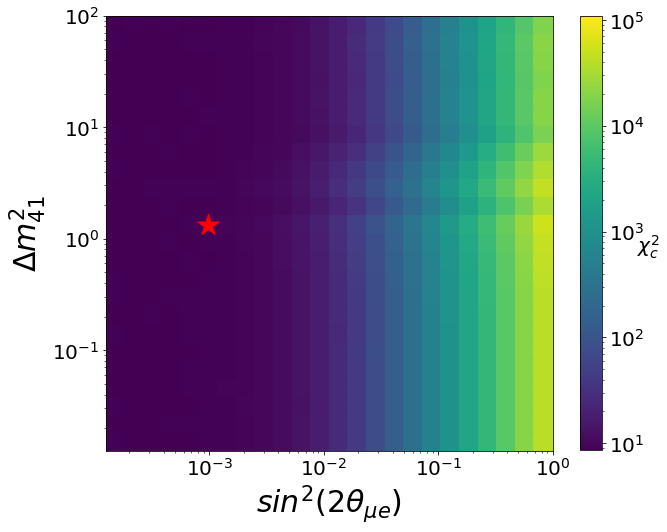

In [26]:
# make sensitivity plots
import matplotlib.colors as colors
fig,ax = plt.subplots(figsize=(10,8))
y,x = np.meshgrid(m41_list, sin22theta_list)

#convert intensity (list of lists) to a numpy array for plotting
intensity_90 = np.array(chi_c_array_90)
# print(intensity)

#now just plug the data into pcolormesh
plt.pcolormesh(x, y, intensity_90,norm=colors.LogNorm(vmin=intensity_90.min(), vmax=intensity_90.max()))
# plt.pcolormesh(x, y, intensity_90)
cbar = plt.colorbar()
cbar.set_label(r'$ \chi^2_c$',rotation=0,fontsize=20)

plt.scatter([0.00098],[1.32],color = 'red',marker='*',s=500)

plt.xlabel(r"$sin^2$(2$\theta_{\mu e}$)",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30) 
plt.xscale("log")
plt.yscale("log")
plt.savefig('CLplot_statonly_210901.png')
plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


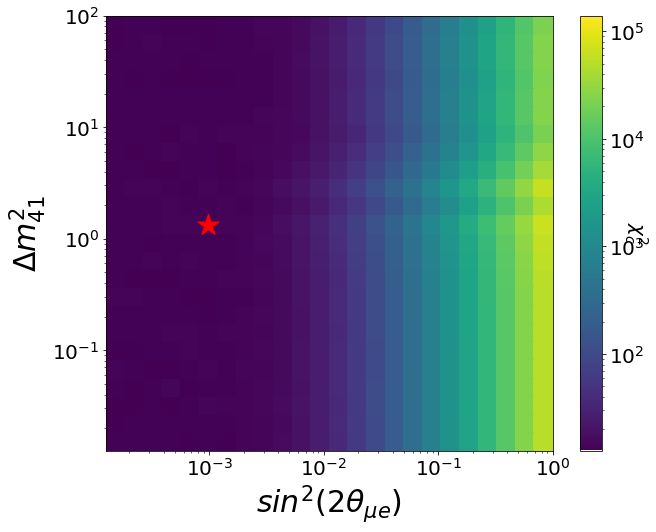

In [27]:
# make sensitivity plots
import matplotlib.colors as colors
fig,ax = plt.subplots(figsize=(10,8))
y,x = np.meshgrid(m41_list, sin22theta_list)

#convert intensity (list of lists) to a numpy array for plotting
intensity_99 = np.array(chi_c_array_99)
# print(intensity)

#now just plug the data into pcolormesh
plt.pcolormesh(x, y, intensity_99,norm=colors.LogNorm(vmin=intensity_99.min(), vmax=intensity_99.max()))
cbar = plt.colorbar()
cbar.set_label(r'$ \chi^2_c$',rotation=270,fontsize=20)

plt.scatter([0.00098],[1.32],color = 'red',marker='*',s=500)

plt.xlabel(r"$sin^2$(2$\theta_{\mu e}$)",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30) 
plt.xscale("log")
plt.yscale("log")
plt.savefig('CLplot_statonly_210901.png')
plt.show()

In [28]:
# load in old chi2 to compare
# read in grid search file info here
# this is complicated since the writing was simplistic
bins = 25
shapeonly = False
usedata= False
with open("gridsearch_MCsens_allosc.txt","r") as gridsearch:
    lines = gridsearch.readlines()
    m41_list =[]
    sin22theta_list=[]
    chi2_list = np.zeros((bins,bins))

    for v in range(bins):
        vals = lines[v].strip()
        m41_list.append(float(lines[v].strip()))
        sin22theta_list.append(float(lines[v+bins].strip()))
        for j in range(bins):
            chi2_list[j][v]=float(lines[v+2*bins+j*bins].strip())
   
    bestm = float(lines[-3].strip())
    bests = float(lines[-2].strip())
    bestchi = float(lines[-1].strip())
    
if False:
    print(m41_list,len(m41_list))
    print(sin22theta_list, len(sin22theta_list))
    print(chi2_list, len(chi2_list),len(chi2_list[0]))
    print(bestm)
    print(bests)
    print(bestchi)

In [29]:
# get contour levels 0 = 90% CL, 1 = 99% CL, 2 = other
# deltachi < 4.6 for 90%, <9.2 for 99% : https://people.richland.edu/james/lecture/m170/tbl-chi.html
confidence_arr = np.zeros((bins,bins))
deltachi_arr = np.zeros((bins,bins))
for s in range(len(chi2_list)):
    for m in range(len(chi2_list[s])):
            if usedata==False: nullchi=0
            else: nullchi = bestchi
            delta = chi2_list[s][m] - nullchi
            deltachi_arr[s][m] = abs(delta)
            if delta == 0: deltachi_arr[s][m] = .000001
            if delta < 4.6:
                confidence_arr[s][m] = .9
            else:
                confidence_arr[s][m] = 1 

/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if sys.path[0] == '':
/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: UserWarning: No contour levels were found within the data range.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'fontsize'


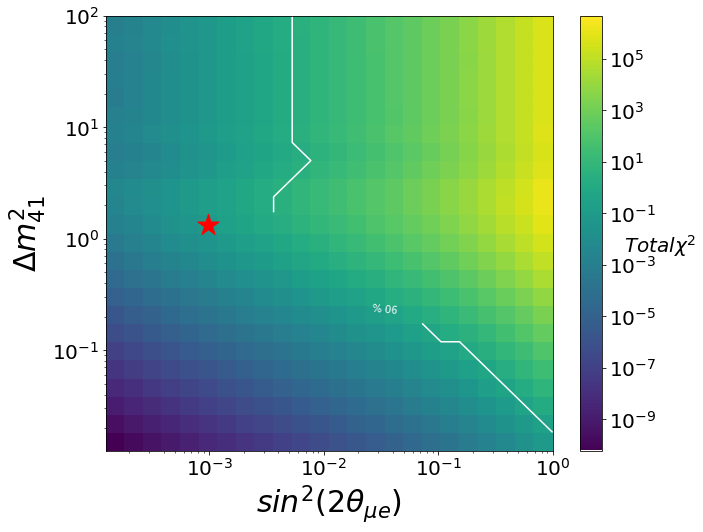

In [30]:
# make CL plots
#setup the 2D grid with Numpy
import matplotlib.colors as colors
fig,ax = plt.subplots(figsize=(10,8))
y,x = np.meshgrid(m41_list, sin22theta_list)

#convert intensity (list of lists) to a numpy array for plotting
intensity = np.array(chi2_list)
# print(intensity)

#now just plug the data into pcolormesh
plt.pcolormesh(x, y, intensity,norm=colors.LogNorm(vmin=intensity.min(), vmax=intensity.max()))
# plt.pcolormesh(x, y, intensity)
cbar = plt.colorbar()
cbar.set_label(r'$Total \chi^2$',rotation=0,fontsize=20)
#contour plots
contours = plt.contour(x, y, confidence_arr,[.9], colors='white',fontsize=20);

def fmt(x):
    s = f"{x*100:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"

label1 = plt.clabel(contours, contours.levels,  fmt=fmt, fontsize=10,rightside_up=False)

plt.scatter([0.00098],[1.32],color = 'red',marker='*',s=500)

plt.xlabel(r"$sin^2$(2$\theta_{\mu e}$)",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30) 
plt.xscale("log")
plt.yscale("log")
plt.savefig('CLplot_statonly_210901.png')
plt.show()

In [31]:
# subtract one from the other
confidence_arr_delta = np.zeros((bins,bins))
for s in range(len(chi2_list)):
    for m in range(len(chi2_list[s])):
            critchi = intensity_90[s][m]
            delta=chi2_list[s][m]
            if delta < critchi:
                confidence_arr_delta[s][m] = .9
            else:
                confidence_arr_delta[s][m] = 1 

[[0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
  0.9 0.9 0.9 0.9 0.9 0.9 0.9]
 [0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys
/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'fontsize'
  import sys
/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: UserWarning: No contour levels were found within the data range.
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'fontsize'
  


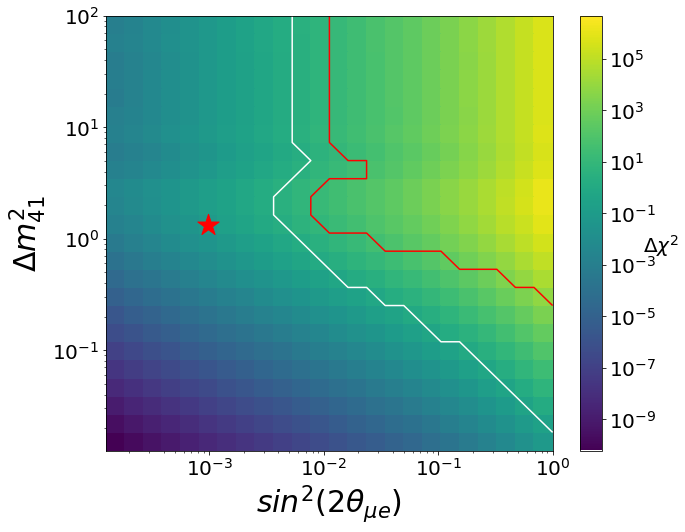

best m: 0.012589254117941673
best s: 0.00012589254117941674
6.18568542567393e-11


In [32]:
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, intensity,norm=colors.LogNorm(vmin=intensity.min(), vmax=intensity.max()))
# plt.pcolormesh(x, y, deltachi)
cbar = plt.colorbar()
cbar.set_label(r'$\Delta \chi^2$',rotation=0,fontsize=20)
#contour plots
contours = plt.contour(x, y, confidence_arr,[.9], colors='white',fontsize=20);
contours_new = plt.contour(x, y, confidence_arr_delta,[.9], colors='red',fontsize=20);

def fmt(x):
    s = f"{x*100:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"

# label1 = plt.clabel(contours, contours.levels, inline=True, fmt=fmt, fontsize=10,rightside_up=False)
# label2 = plt.clabel(contours_new, contours_new.levels, inline=True, fmt=fmt, fontsize=10,rightside_up=False)

plt.scatter([0.00098],[1.32],color = 'red',marker='*',s=500)

plt.xlabel(r"$sin^2$(2$\theta_{\mu e}$)",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30) 
plt.xscale("log")
plt.yscale("log")
plt.savefig('CLplot_statonly_210901.png')
plt.show()

print("best m:",bestm)
print("best s:",bests)
print(bestchi)
